In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"

from checkpoint_pipeline import *

/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_41/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# <h1><center><ins>PIPELINE</ins></center></h1>
<h1><center>Práctica guiada:</center></h1>
<img src="img/00_pipelines.jpg" alt="Drawing" style="width: 400px;"/>

<a id="tabla_contenidos"></a> 
## Tabla de Contenidos

### <a href='#section_objetivos'>0. Objetivos de la Notebook</a>


### <a href='#section_repaso'>1. Introducción</a>
- #### <a href='#section_reg_vs_clas'>1.1 ¿Qué es un Pipeline?</a>
- #### <a href='#section_outcomes'>1.2 Implementación general de un Pipeline</a>
- #### <a href='#section_matriz_confusion'>1.3 ¿Por qué es importante usar Pipelines?</a>


### <a href='#2.'>2. Un pipeline simple</a>

### <a href='#3.'>3. Pipeline + GridSearch</a>

### <a href='#4.'>4. Pipeline + GridSearch + funciones propias de preprocesado</a>

### <a href='#5.'>5. Comentarios finales</a>
---

<a id="section_objetivos"></a> 
## 0. Objetivos de la Notebook

<div id="caja11" style="float:left;width: 100%;">
  <div style="float:left;width: 9%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;">
      <label>Limpiar y manipular datos utilizando</label>
      <a class="reference internal" href=https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html><b><code>Pipeline</code></b></a> 
  <div style="float:left;width: 85%;">
      <label>Usar <code>Pipeline</code> combinado con <code>GridSearch</code></label>
  <div style="float:left;width: 85%;">
      <label>Usar <code>Pipeline</code> combinado con pasos propios de preprocesamiento y</label>
      <a class="reference internal" href=https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html><b><code>FeatureUnion</code></b></a>
</div>

<a href='#tabla_contenidos'>Volver a TOC</a>

---

<a id="section_repaso"></a> 
## 1. Introducción

<a id="section_reg_vs_clas"></a> 
### 1.1 ¿Qué es un Pipeline?


Una parte típica del trabajo de un DataScientist implica preparar los datos en diversos grados para luego aplicar algún **algoritmo de machine learning** como los que ya hemos visto en el curso. Esta preparación puede implicar cambios de escala, combinar features, reducir la dimensionalidad de las variables, entre otras muchas actividades. Es decir, que la mayoría de los problemas de machine learning no implican solamente la aplicación de **un algoritmo o modelo** en particular, sino el encadenamiento de muchos **diferentes procesos** e incluso la evaluación de distintos **algoritmos o modelos**. Ante la complejidad de esta situación, vamos a contar con una clase de **scikit-learn** denominada [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) que nos va a permitir simplificar el encadenamiento de pasos en la preparación y evaluación de los modelos que querramos aplicar. Pero...


<img src="img/06_pipelines.png" alt="Drawing" style="width: 300px;"/>





[`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) es una clase de **scikit-learn** que nos permite encadenar o aglutinar múliples pasos de procesamiento en un sólo estimador. Un `pipeline` es en sí un estimador de **scikit** que tiene los métodos `fit`, `predict` y `score`, igual que cualquiera de los modelos que hemos utilizado anteriormente, como la [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) o [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). El uso más común (aunque no el único) de `pipeline` es encadenar una serie de pasos de preprocesamiento (como escalar los datos) junto con un clasificador. Además, al ser re-utilizables, un `pipeline` permiten ejecutar exactamente las mismas transformaciones sobre distintos datasets, asegurando consistencia y replicación de nuestros trabajos.

Algo **muy importante** (y que retomaremos en profunidad más adelante) es que todos los pasos que encadenemos en un `pipeline`, con excepción del último, tienen que tener un método `fit` y un método `transform` para que puedan generar una nueva representación de la data que va a ser usado en el paso siguiente. Es decir, que cada paso se “alimenta” del paso previo (iremos viendo esto en profunidad más adelante en la notebook, así que si sienten que esto todavía es un poco abstracto o confuso: 

<img src="img/06_be_calm.jpg" alt="Drawing" style="width: 200px;"/>

<a id="section_outcomes"></a> 
### 1.2 Implementación general de un Pipeline

Antes de pasar a ver el código, esta es la implementación general de un `pipeline`: 
- Para construirlo se de deben pasar una **lista de pasos**: cada paso es una **tupla** que contiene un **nombre** (cualquier texto de su elección, pero que sea claro y conciso) y una instancia de un **estimador**. 
- En el siguiente ejemplo, vemos cómo se importa la clase `pipeline` de **sklearn** y se definen dos pasos: un estimador para escalar los datos y uno para realizar una clasificación: 
<img src="img/07_pipelines.JPG" alt="Drawing" style="width: 1200px;"/>


- Con esto generamos dos etapas: la primera llamada **scaler**, que es una instancia de `MinMaxScaler`, y la segunda, llamada **knn**, que es una instancia de un `KNeighborsClassifier`. A partir de esto se puede utilizar el método `fit`para entrenar el modelo como cuando hemos utilizado otros estimadores de **scikit-learn**:
<img src="img/08_pipelines.JPG" alt="Drawing" style="width: 1200px;"/>



- La línea de código `pipe.fit` ejecuta el `fit` del primer paso (el escalador, **scaler**), luego aplica el `transforms` del escalador a los datos de train, y finalmente utiliza `fits` the **knn** con los datos escalados. Y para evaluar en los datos de **test**, simplemente tenemos que llamar a `pipe.score`:
<img src="img/09_pipelines.JPG" alt="Drawing" style="width: 1200px;"/>


- Cuando llamamos al método `score` del `pipeline` lo que sucede es que primero la data de test (**X_test**) es transformada (aplica el método `transform` pero no el `fit`) utilizando el **scaler**, y luego se llama al método `score` de **knn** usando los datos de test re-escalados. Con `pipeline`, vemos que podemos reducir y sistematizar nuestro código de **preprocesamiento+clasificación**. Observemos un resumen de esos pasos en el siguiente esquema (**T1** y **T2** representan dos pasos de preprocesamiento, mientras que **Classifier** se refiere a un clasificador): 
<img src="img/10_pipelines.JPG" alt="Drawing" style="width: 600px;"/>



- Un `pipeline` puede ser más general que este ejemplo (y al final de la notebook verán varios casos más complejos). No es necesario que la úlima etapa de un `pipeline` conenga un método `predict`, y se podría generar un `pipeline` que sólo contuviera, por ejemplo un **scaler** y un **PCA**. En este caso, dado que el último paso (**PCA**) contiene un método `transform`, se puede llamar a ese método en el pipeline para obtener el resulado de `pca.transform` que fue aplicado a la data re-escalada en el paso previo. Es decir, que el **último paso** de un `pipeline` sólo requiere que tenga un método `fit`.

<a id="section_matriz_confusion"></a> 
### 1.3 ¿Por qué es importante usar Pipelines?
Usar `pipeline` reporta varias ventajas: 
- Conveniencia en la creación de un flujo de trabajo coherente y fácil de entender.
- Aplicación de la implementación del flujo de trabajo y el orden deseado de sus aplicaciones.
- Reproducibilidad,
- Valor en la persistencia de objetos enteros del pipeline (va a la reproducibilidad y la conveniencia).
- Combinación con `GridSearch` : ya que en nuestra grilla de búsqueda de hiperparámetros vamos a poder incluir la combinación también de etapas de preprocesamiento que sean opcionales, y nos va a permitir evitar el **data leakage** que se produce cuando tenemos que escalar datos y nos enfrentamos a un esquema de validación cruzada (no se preocupen que veremos un ejemplo de esto más adelante). Así que, dado su **importancia y relevancia**... 

<img src="img/02_pipelines.JPG" alt="Drawing" style="width: 300px;"/>





<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>Otra opción para armar un pipeline:</b> muchas veces no queremos darle nombres específicos a cada uno de los pasos que vamos a utilizar (aunquegeneralmente es importante hacerlo y nos va a ser muy útil), así que podemos utilizar una clase, <a class="reference internal" href=https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html><b><code>make_pipeline</code></b></a>, que nos va a permitir crear rápidamente <code>Pipeline</code> y en forma automática va a nombrar cada uno de los pasos de cada clase: </label></div>
</div>

<img src="img/11_pipelines.JPG" alt="Drawing" style="width: 1200px;"/>

Para ver el nombre de las etapas, podemos simplemente ingresar a `.steps`
<img src="img/12_pipelines.JPG" alt="Drawing" style="width: 1400px;"/>

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Entonces... </b></label></div>
</div>

In [2]:
#Ejecutá esta celda...
test_1()


Para construir un Pipeline se deben pasar:



RadioButtons(layout=Layout(width='100%'), options=('Un diccionario que contiene el nombe de cada paso y instan…

Button(description='Validar', style=ButtonStyle(), tooltip='Click para validar')

Output()

<a href='#tabla_contenidos'>Volver a TOC</a>

---

<a id="2."></a> 
## 2. Un pipeline simple

Vamos a empezar a probar cómo armar `pipeline` de distinto nivel de complejidad. Para ello vamos a utilizar un dataset sobre la calidad de vinos que puede encontrarse en la página de Kaggle: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

El dataset está asociado a variantes rojas de un vino Portuguez. En la página de kaggle pueden encontrar la descripción de qué significan todas las variables. 

Importemos y exploremos un poco el dataset: 

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('../Data/winequality-red.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- En el dataset no tenemos valores nulos, todas las variables son `float64` salvo **quality** que es un `int64`. Esta última contiene la información que vamos a tratar de predecir. Para ello primero vamos a binarizar la variable discriminando entre vinos de alta calidad y vinos de baja calidad (utilizaremos un criteio arbitrario con el objetivo de simplifiar el problema). En definitiva, vamos a plantear un problema de clasificación, cuyo objetivo es ver qué tan bien las variables que caracterizan al vino predicen su calidad.

Binarizamos la calidad: 

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Como criterio arbitrario, todos los vinos que tengan una calidad igual o mayor a 6 los vamos a considerar de buena calidad (les pondemos un 1 como etiqueta), mientras que los que sean inferiores a 6 los consideraremos de baja calidad (y los etiquetaremos con un 0):

In [7]:
df['quality_bin']=df['quality'].apply(lambda x: 1 if x>=6 else 0)
df['quality_bin'].value_counts(normalize=True)

1    0.534709
0    0.465291
Name: quality_bin, dtype: float64

- Dado el criterio que utilizamos, los datos quedaron relativamente balanceados.

Antes de armar el `pipeline`, vamos a separar la `X` y la `y`, y vamos a separar nuestros datos en aquellos que vamos a usar para el entrenamiento y los que servirán para testear el modelo.

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# Separamos las variables independientes de la target
X=df.drop(columns=['quality','quality_bin'])
y=df['quality_bin']

# Dividimos los datos en el set de train y el de test: 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=30, stratify=y)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1119, 11)

(480, 11)

(1119,)

(480,)

Para la clasificación vamos a utilizar como modelo un [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) con la configuración de hiperparámetros por default. Es importante recordar que si las features están en unidades diferentes, necesitamos escalar los datos, así que para eso vamos a utilizar el estimador de sklearn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

Este caso, donde primero tenemos que implementar un escalado de los datos, nos encontramos ante un escenario en donde podemos utilizar `pipeline` para sistematizar el proceso, siguiendo los siguientes pasos: 

**0-** Importamos las librerías que vamos a utilizar

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

**1-** Generamos la lista de pasos que le vamos a pasar al `pipeline`. Estos pasos son una lista de tuplas que consisten en el **nombre** y un **transformador** o un **estimador**

In [11]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

**2-** Instanciamos `pipeline` con los pasos que definimos en el punto anterior:

In [12]:
pipe = Pipeline(pasos)

Los **estimadores** que definimos en el `pipeline`se guardan como una lista en el atributo `steps` y podemos acceder a ellos de la siguiente manera: 

In [13]:
# Accedemos al escalador
pipe.steps[0]

('scaler', StandardScaler())

In [14]:
# Accedemos al clasificador
pipe.steps[1]

('knn', KNeighborsClassifier())

La misma información queda guardada en el atributo `named_steps`pero como un diccionario: 

In [15]:
pipe.named_steps['scaler']

StandardScaler()

In [16]:
pipe.named_steps['knn']

KNeighborsClassifier()

Del mismo modeo que podemos acceder y identificar cuáles son los parámetros de los estimadores, también podemos modificarlos directamente desde el `pipeline`, usando la siguiente sintaxis **estimador__parámetro**:

In [17]:
# Cambiamos la cantidad de vecinos que vienen definidos por 4
pipe.set_params(knn__n_neighbors=4)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

**3-** Entrenamos el `pipeline` con los datos de entreanamiento:

In [18]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=4))])

**¿Qué sucedió acá?**: Cuando utilizamos el método `.fit` de pipe sobre los datos de **train**, primero se ejecutó para estos datos el escalador, siendo que internamente el escalador aplicó el `.fit` para aprender la media y desvío de la variable, y luego `.transform` para que lo que aprendió se aplique a los datos y los pase de escala. Luego, los datos re-escalados fueron entrenados (`.fit`) con el [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

Es decir, que ahora el objeto `pipe` va a contar con métodos para que evaluemos nuestro modelo (`.predict`, y `.score`).

Probemos ahora qué tan bien generaliza el modelo:

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
pipe.score(X_test,y_test)

0.725

In [65]:
accuracy_score(y_test, pipe.predict(X_test))

0.725

- Dado que nuestro modelo está relativamente balanceado, el **accuracy** nos otorga una medida confiable de cómo está funcionando su generalización. Los resultados **superan el 0.53** que es el valor que se obtendría de un **clasificador dummy** que etiquete a todos los casos con la clase de la mayoría (los vinos de buena calidad). 

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>Recuerden que:</b> cuando aplicamos el <code>.score</code> o <code>.predict</code> del <code>pipeline</code> entrenado, lo que está sucediendo es que primero se está aplicando el <code>.transform</code> del paso de escalamiento de los datos, y luego se aplica sobre estos datos re-escalados en función de los datos de train, el <code>.score</code> o <code>.predict</code> del clasificador. Es decir que nuevamente con una sóla línea de código se están ejecutando los distintos pasos que definimos</label></div>
</div>

Veamos ahora si podemos mejorar nuestros resultados combinándo el `pipeline` con una herramienta muy poderosa que ya hemos visto en clases anteriores para hacer la búsqueda de hiperparámetros: el [`GridSearch`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Entonces... </b></label></div>
</div>

In [22]:
#Ejecutá esta celda...
test_2()


Cuando aplicamos los métodos .score o .predict de un Pipeline sobre los datos de test:



RadioButtons(layout=Layout(width='100%'), options=('Desde el paso inicial hasta el anteúltimo se aplica el mét…

Button(description='Validar', style=ButtonStyle(), tooltip='Click para validar')

Output()

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="3."></a> 
## 3. Pipeline + GridSearch

Probemos ahora combinar nuestro `pipeline` con la búsqueda de hiperparámetros del modelo `knn`de classificación.

Generamos nuevamente la lista de pasos que le vamos a pasar al `pipeline` y lo instanciamos.

In [23]:
pasos = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

In [24]:
pipe_grid = Pipeline(pasos)

Ahora, importamos `GridSearchCV` y una clase para definir los kfold del esquema de validación

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

Generamos la grilla de hiperparámetros para explorar cuáles son los mejores para `knn`. Fijensé que la particularidad de esta grilla de parámetros es que su sintaxis es diferente a cuand la hacemos para usar sólo con `GridSearchCV`. 

En esta ocasión que la estamos combinando con un `pipeline` tenemos que indicar, de alguna manera, a cuál de las estapas del proceso corresponde los hiperparámetros que queremos evaluar (y más adelante vamos a ver que nó sólo de los estimadores vinculados a modelos vamos a poder hacer búsqueda de **hiperparámetros**). 

Para indicar el paso y el hiperparámetro usamos la siguiente sintaxis: 

- **nombre_paso__nombre_hiperparámetro**

In [26]:
param_grid = {'knn__n_neighbors':range(2,20,2),'knn__weights':['uniform','distance']}

Definida la grilla de hiperparámetros, instanciamos el `GridSearchCV` usando `pipe` (donde tenemos instanciado nuestro `pipeline`) y la grilla definida; y luego entrenamos el modelo:

In [27]:
grid = GridSearchCV(pipe, param_grid, cv=folds)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=4))]),
             param_grid={'knn__n_neighbors': range(2, 20, 2),
                         'knn__weights': ['uniform', 'distance']})

Veamos cómo le fue al mejor modelo: 

In [28]:
grid.best_score_

0.7757206918641896

- En comparación al modelo anterior, esta nueva configuración ganó varios puntos de desempeño (pasó de 0.725 a 0.781)

Veamos cuál es la mejor configuración

In [29]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=8, weights='distance'))])

Como podemos observar, en `grid.best_estimator_` no sólo está la mejor configuración del modelo, sino que también está configurado el paso previo de preprocesamiento. Así podemos utilizar el método `.predict`y del mismo modo que en el ejemplo simple, cuando lo usemos con los datos de testing, de fondo se ejecutará el método `.transform` del StandardScaler y luego el `.predict` del mejor modelo `knn`:

In [30]:
accuracy_score(grid.best_estimator_.predict(X_test),y_test)

0.78125

Por lo que vemos, este nuevo modelo hiperparametrizado mantiene incluso un buen desempeño en el test.

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>Recuerden que:</b> cuando realizamos una hiperparametrización de un modelo que requiere la utilización de una <b>normalización</b>, utilizar un <code>pipeline</code> nos permite evitar caer un <b>data leakage</b>. Este <b>data leakage</b> se produciría si nosotros normalizamos los datos de train usando LA TOTALIDAD de los datos de train. El pipeline combinado con el <code>GridSearchCV</code> genera que en cada fold, cuando los datos de train se separan en datos de train y datos de validación, la normalización se entrene sólo sobre los datos que quedaron de train pero <b>SIN tener en cuenta los de validación</b>. Y este esquema se repite en cada fold. De este modo estamos evitando que información de datos que se utilizan para validación en el contexto de un esquema de validación cruzada contaminen los datos que se utilizan para el entrenamiento.</label></div>
</div>

Ahora bien, del mismo modo que podemos usar `GridSearch` para identificar la mejor configuración del modelo, también podemos explorar cuál es la mejor configuración de distintos pasos o tipos de procesamiento combinados con el modelo. 

Por ejemplo, podemos evaluar si obtenemos una mejor performance usando [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) o con el [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Es decir, podemos probar combinaciones bastante complejas de grillas que nos permitan elegir cuál es la mejor configuración entre pasos de preprocesamiento y configuraciones de modelos.

Vamos a importar del módulo `preprocessing` de `sklearn` una herramienta para normalizar entre valores mínimos y máximos: [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

In [31]:
from sklearn.preprocessing import MinMaxScaler

Tal como hicimos antes, definimos los que vamos a usar en el `pipeline`. En una primera instancia sólo definimos que en el paso de **preprocesamiento** vamos a utilizar el `StandardScaler`. Luego con la grilla de parámetros vamos a incluir como opción en ese paso que durante el `GridSearch` haya una combinación que incluya la utilización del `MinMaxScaler`, e incluso vamos a pasarle una opción para que prueba una combinación **sin** usar una normalización (por lo que hemos visto en clases pasadas sabemos que con el modelo `KNeighborsClassifier` necesitamos sí o sí tener las features en la misma unidad de medida, pero en este caso ponemos como opción en el `pipeline`que no use una normalización previa para probar que también podemos incluir como opción que el proceso incluya o no un paso. 

In [32]:
pasos = [('peprocesamiento', StandardScaler()), ('clasificador', KNeighborsClassifier())]
pipe_grid_dos = Pipeline(pasos)

Definimos ahora la **grilla** incluyendo tanto opciones de pasos de preprocesamiento, como también opciones de hiperparámetros del modelo. Es importante entender de la siguiente grilla, que los pasos de **preprocesamiento** representan opciones de todo nuestro `pipeline`. ¿Qué significa esto? Que, en combinación con `GridSearch` lo que vamos a estar evaluando es si el modelo es mejor incluyendo el `StandardScaler` o el `MinMaxScaler` o no incluyendo ninguna normalización. Pero en ningún momento se van a aplicar las tres opciones a la vez ya que son mutuamente excluyentes (podríamos incluir más pasos de preprocesamiento que estén encadenados, pero para eso tendríamos que agregar otro paso, por ejemplo `preprocesamiento_dos`, antes del clasificador). Y además, vamos a estar evaluando cuál es el mejor paso de **preprocesamiento** en combinación con la potencia de estar buscando la **mejor configuración de nuestro modelo**. Todo este proceso nos empieza a brindar una intuición de por qué es importante manejar los `pipeline` y su potencia a la hora de buscar la mejor configuración de procesos para el problema de datos que estemos enfrentando, ya que nos va permitir ahorra tiempo y muuuuuchas líneas de código. 

In [33]:
new_param_grid = [{'peprocesamiento':[StandardScaler(), MinMaxScaler(), None], 
                   'clasificador__n_neighbors':range(2,20,2), 'clasificador__weights':['uniform','distance']}]                

Tal como antes, instanciamos el `GridSearchCV` usando el objeto de `pipeline` que instanciamos antes + la nueva grilla de parámetros que definimos.

In [34]:
grid_dos=GridSearchCV(pipe_grid_dos, new_param_grid, cv=folds)
grid_dos.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('peprocesamiento', StandardScaler()),
                                       ('clasificador',
                                        KNeighborsClassifier())]),
             param_grid=[{'clasificador__n_neighbors': range(2, 20, 2),
                          'clasificador__weights': ['uniform', 'distance'],
                          'peprocesamiento': [StandardScaler(), MinMaxScaler(),
                                              None]}])

Antes de ver cuáles fueron las opciones de pasos de **preprocesamiento** y de **configuración del modelo**, conozcamos qué tan bien le fue a la mejor combinación en los datos de validación: 

In [35]:
grid_dos.best_score_

0.7757206918641896

Por lo que vemos, nuestro desempeño en validación se incrementó en comparación a los anteriores. 

Veamos ahora cuál fue la combinación de pasos que triunfó: 

In [36]:
grid_dos.best_estimator_

Pipeline(steps=[('peprocesamiento', StandardScaler()),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=8, weights='distance'))])

Por lo que vemos, la mejor combinación incluyó al `MinMaxScaler` en vez del `StandardScaler` que fue la normalización que seleccionamos en un primer momento. Y al cambiar el modo de hacer esa normalización, también cambió la cantidad de vecinos (ahora 16). Y fijense que con muy pocas líneas de código establecimos esquemas de validación cruzada que hacen una búsqueda de distintas combinaciones de **procesamiento** y **configuraciones** de modelos que pueden mejorar nuestros resultados. Y en breve vamos a ver cóm podemos complejizar y aprovechar esto aún más. 

Veamos por último cómo nos va con los datos de test

In [37]:
accuracy_score(grid_dos.best_estimator_.predict(X_test),y_test)

0.78125

Con los datos de test todvía seguimos teniendo un score alto. 

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png" style="align:left"/> </div>
  <br>
  <div style="float:left;width: 85%;"><label><b>Recuerden que:</b> Cuando están evaluando <b>distintos modelos o configuraciones de modelos o de pasos de preprocesamiento</b>, la elección de <b>cuál es el modelo que finalmente sea el de mejor</b> desempeño <b>NUNCA</b> la deben hacer sobre los <b>datos de test</b> que se hayan separado en un principio. Los datos de test los tienen que pensar siempre como los datos reales, es decir, tienen que reflejar de la mejor manera posible el escenario en el que ustedes salen a producción con su modelo y se enfrenta contra información que llega nueva, y que no está contaminada por nada de lo que hicieron ustedes previamente. Si ustedes utilizan los datos de test para tomar decisiones de cuál es el mejor modelo de los que están trabajando, pueden caer en serios <b>problemas de overfitting</b> y que sus <b>modelos luego no generalicen bien</b>. Por eso es importante que la decisión sobre estapas de preprocesamiento o modelos la hagan siempre basados en el <b>esquema de validación</b> y, una vez elegido el modelo que mejor funciona en ese contexto, recién ahí lo comprueben con los datos de test (y por eso es que es necesario tener muchos datos para nuestro trabajo). En esta notebook, dado que tiene un fin pedagógico no estamos haciendo una elección del mejor modelo y por eso en cada paso también incluímos la comprobación con los datos de test, pero tenemos que tener en cuenta muy bien cuál es la práctica correcta cuando estemos trabajando en un escenario real</label></div>
</div>

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Entonces... </b></label></div>
</div>

In [38]:
#Ejecutá esta celda...
test_3()


Combinar Pipeline con GridSearchCV:



RadioButtons(layout=Layout(width='100%'), options=('Nos permite evaluar cuáles son los mejores pasos de prepro…

Button(description='Validar', style=ButtonStyle(), tooltip='Click para validar')

Output()

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="4."></a> 
## 4. Pipeline + GridSearch + funciones propias de preprocesado

A veces las clases que existen en el módulo de preprocesamiento de sklearn pueden "quedarnos chicas". Es decir, puede ser que tengamos que definir alguna otra transformación para el preprocesamiento que no exista en el módulo.

Por suerte `scikit-learn` nos permite integrar funciones porpias con el `pipeline`, pero para eso tenemos que repasar un poco el concepto de **herencia** en las clases (y si quieren repasar el concepto de **programación orientada a objetos** y de **clases** pueden visitar este link: https://www.programiz.com/python-programming/class).

En `scikit-learn` todos los **transformadores** y **estimadores** están implementados como **clases de python**, cada uno con sus atributos y métodos. Cada vez que instanciamos esas clases en objetos, esos objetos pueden ahora utilizar los métodos de la clase (tales como son `.fit`,  `.transform`, `.fit_transform` en `scikit-learn`). Para que nuestras funciones de preprocesamiento customizadas puedan ser utilizadas por `pipeline` tienen que tener estos métodos. Ante esto, podemos o bien escribir todos estos métodos..., o simplemente escribir qué transformación queremos hacer y que los métodos sean **heredados** de una clase pre-existente. 

Miremos lo que pasa con nuestro amigo  **Boba Fett** y su creación (y si te estás preguntando, ¿quién es **Boba Fett**?, te dejo un link https://es.wikipedia.org/wiki/Boba_Fett, y la recomendación de que veas una trilogía de películas): 

<img src="img/13_boba.png" alt="Drawing" style="width: 500px;"/>


Siguiendo este ejemplo, imaginémonos que queremos escribir una clase cuyo resultado se parezca al lego final de esta evolución (es decir, al que se ve como **Boba Fett**). Una opción podría ser empezar la construcción de **Boba Fett** empezando desde cero y escribiendo el código que me lleve desde el primer bloque de lego hasta el resultado final. Sin embargo, ¿no sería mejor poder empezar desde el paso justo antes de tener a **Boba Fett** para así ahorrarnos tanto trabajo? Si tomamos este camino, no tendríamos que empezar desde cero y ya tendríamos un montón de metódos incluídos en nuestro objeto sin que hayamos escrito ninguno de ellos por nosotros mismos. Podríamos simplemente utilizar ese anteúltimo ejemplo y añadirle todos los métodos que querramos hasta que tengamos a nuestro amigo **Boba Fett**. Esto que podemos hacer con **Boba Fett**  es exactamente lo que hacen las **herencias en las clases de python**.

Ahora bien, ¿cómo podemos **heredar** los métodos de las clases de `scikit-learn` para tenelos disponibles para nuestras propias clases? Por suerte `scikit-learn` nos provee de dos clases de base que nos van a permitir hacer esto de una manera muy sencilla: [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html), y [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html).

Por un lado, [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) nos va a permitir que nuestra herede los métodos `get_params` y `set_params`.

Por otro lado, [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html) nos va permitir obtener los métodos `.fit`, `.transform` y `.fit_transform`. De estos, `fit` no lo vamos a utilizar para el preprocesamiento, en general, ya que no vamos a estar "aprendiendo" nada, sino que nos va a devolver el objeto en sí. Donde sí vamos a trabajar es en el método `.transform`, ya que con él vamos a definir qué es lo que vamos a hacer con nuestro dataset.

Bueno, esto ya fue muuuucho texto, pasemos a ver cómo se ve todo esto en el código:

<img src="img/14_baby.png" alt="Drawing" style="width: 300px;"/>


**1- Generamos una función de selección de features**

Vamos a comenzar con un caso simple en el que añadimos al procesmiento que estábamos haciendo, una selección de features. 

El primer paso para ello es importarnos las clases [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html), y [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html)

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin

Aunque no es la mejor estrategia dado que nuestra etiqueta son 1 y 0, vamos a seleccionar features en función de su nivel absoluto de correlación con la variable target. Inspeccionemos primero cuáles son usando los datos de train para evitar tomar decisiones usando datos que estén incluídos en test y que **NO** tenemos que usar en esta etapa. 

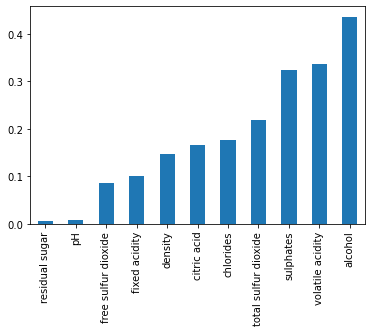

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

features=abs(pd.concat((X_train,y_train),axis=1).corr(method='spearman'))['quality_bin'].drop(index='quality_bin').sort_values()
features.plot(kind='bar');

Vamos a crear ahora una clase que nos permita seleccionar ciertas columnas de nuestro dataframe y que herede los métodos de `scikit-learn` que necesitamos. 

In [68]:
# Fijense que iniciamos la clase con el nombre "FeatureSelection" y le pasamos las clases "BaseEstimator" y 
# "TransformerMixin" para que herede los métodos de scikit-learn que necesitamos para el pipeline.
class FeatureSelection(BaseEstimator, TransformerMixin):
    
    # Cuando iniciamos una clase, pasamos su constructor, que es el método __init__ para definir los 
    # argumentos y parámetros que se van a utilizar los métodos. Fijense que en este caso tenemos 
    # un solo argumento "selected_features" que es el que nos va a permitir seleccionar 
    # cuáles son las features con las que nos queremos quedar. 
    # Noten que en este método y en los demas el primer argumento es siempre "self". Esto se refiere a que
    # cada vez que un objeto llama a un método (por ejemplo, "__init__" o "fit", en este caso) el mismo objeto
    # es pasado como el primer argumento. Por esta razón el primer agumento de un método en una clase debe ser
    # siempre el objeto en sí mismo, y por convención se usa el término "self" para referirse a él mismo.
    def __init__(self,selected_features):
        self.selected_features=selected_features
    
    # Dado que nuestro objetivo no es "aprender nada en particular" de los datos, el método "fit" lo único 
    # que hará es devolvernos el mismo objeto. 
    def fit(self,X,y=None):
        return self
    
    # En el método "transform" sí vamos a incluir lo que queremos que nuestra clase haga con los datos. En este
    # caso queremos que seleccione del dataframe las columnas que le pasemos.
    def transform(self, X, y=None):
        return X[self.selected_features]

Antes de pasar esta nueva clase que generamos, `FeatureSelection`, en un `pipeline`, probemos su uso.

In [69]:
# generamos una copia del dataset
X_prueba=X.copy()
X_prueba.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [70]:
# instanciamos la nueva clase, y pasamos cuáles son las features que queremos seleccionar

seleccionador=FeatureSelection(selected_features=['citric acid','residual sugar','chlorides'])

In [71]:
# utilizamos el método fit_transform para ver el resultado de aplicar nuestro nuevo objeto en los datos

seleccionador.fit_transform(X_prueba).head()

,citric acid,residual sugar,chlorides
0,0.00,1.9,0.076
1,0.00,2.6,0.098
2,0.04,2.3,0.092
3,0.56,1.9,0.075
4,0.00,1.9,0.076


Tal como planteamos, la clase nos permite seleccionar features. Veamos ahora cómo introducimos la clase en un `pipeline`, quedándonos como criterio arbitrario, con aquellas features que tienen un valor >0.1 de correlación con la variable target.

Construimos la lista de pasos (usamos directamente el `MinMaxScaler` para la normalización ya que antes vimos que funcionaba mejor que el `StandardScaler`) y los pasamos al `pipeline`.

In [72]:
pasos = [('feature_engineering',FeatureSelection(selected_features=features[features>0.1].index.values)),
         ('peprocesamiento', MinMaxScaler()), 
         ('clasificador', KNeighborsClassifier(n_neighbors=2))]

pipe_grid_tres=Pipeline(pasos)

Definimos ahora los **hiperparámetros** del modelo de `KNeighborsClassifier` que queremos explorar

In [73]:
new_param_grid = [{'clasificador__n_neighbors':range(2,20,2), 'clasificador__weights':['uniform','distance']}]

Y ahora, tal como hicimos antes, pasamos al `GridSearchCV` el `pipeline` y la grilla para la búsqueda de **hiperparámetros**, y corremos el `.fit` con los datos de entrenamiento.

In [74]:
grid_tres=GridSearchCV(pipe_grid_tres, new_param_grid, cv=folds)
grid_tres.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureSelection(selected_features=array(['fixed acidity', 'density', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'volatile acidity', 'alcohol'],
      dtype=object))),
                                       ('peprocesamiento', MinMaxScaler()),
                                       ('clasificador',
                                        KNeighborsClassifier(n_neighbors=2))]),
             param_grid=[{'clasificador__n_neighbors': range(2, 20, 2),
                          'clasificador__weights': ['uniform', 'distance']}])

**¿Qué fue lo que pasó recién?** Si se fijan en los steps del `pipeline`, lo que acabamos de hacer es combinar el esquema de validación cruzada con: un primer paso de selección de features, un segundo paso de normalización y por último el entrenamiento del modelo. Y toda esta secuencia se acaba de aplicar para cada uno de los folds de `GridSearchCV`, y una última vez con todos los datos pero eligiendo la mejor configuración del modelo.

Veamos ahora cómo nos fue en los datos de validación utilizando sólo una selección de features: 

In [75]:
grid_tres.best_score_

0.7739229660474055

Y podemos ver cuáles son los nuevos **hiperparámetros** de `KNeighborsClassifier` que se seleccionaron: 

In [76]:
grid_tres.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureSelection(selected_features=array(['fixed acidity', 'density', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'volatile acidity', 'alcohol'],
      dtype=object))),
                ('peprocesamiento', MinMaxScaler()),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=18, weights='distance'))])

Y por último, podemos, como hacíamos antes pasar todo este `pipeline` a los datos de **test**. Tenemos que tener en cuenta que ahora se va a ejecutar nuevamente todos los procesos de nuestro `pipeline` (desde la selección de features hasta la aplicación del modelo) pero para los datos de **test** y sin aplicar los `.fit` sino directamente los `.transform`.

In [77]:
grid_tres.score(X_test,y_test)

0.78125

**2- Sumamos una función para generar nuevas features**

Vamos un paso más: además de seleccionar las features con las que nos queremos quedar, vamos a generar una nueva feature que sea el ratio entre dos variables de las seleccionadas: **residual sugar** y **alcohol** (la elección es arbitraria, podrían haber sido otras variables, pero la idea es ver cómo podemos incorporar el proceso de **feature engineering** en nuestro `pipeline`.

Primero vamos a generar una clase cuyo método transform tome dos features del dataframe, realice la división entre ellas y devuelva un dataframe de sóla columna que representa el ratio entre ambas para cada entrada del dataframe. 

Usamos nuevamente [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html), y [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) para que nuestra clase herede los métodos que necesitamos de las clases de `scikit-learn`.

In [78]:
class FeatureDivision(BaseEstimator, TransformerMixin):
    
    def __init__(self,columna_dividendo,columna_divisor):
        self.columna_dividendo=columna_dividendo
        self.columna_divisor=columna_divisor
        
    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return pd.DataFrame(X[self.columna_dividendo]/X[self.columna_divisor],
                            index=X.index.values,
                            columns=[self.columna_dividendo+'_'+self.columna_divisor])

Ambos casos de preprocesamiento podríamos encadenarlos en forma secuencial, pero en vez de eso vamos a hacerlo usando la clase [`FeatureUnion`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html) de `scikit-learn`.

A diferencia de un enfoque secuencial, esta clase nos permite concatenar los resultados de múltiples transformadores. Es decir, que en nuestro caso, `FeatureUnion` nos va a permitir concatenar el dataframe con las features seleccionadas y el dataframe que contiene la nueva feature que generamos. Es decir que `FeatureUnion` le aplica a la data una serie de objetos que sean transformadores en forma paralela a la data, y luego concatena el resultado. Esta clase es muy útil para **combinar distintos mecanismos de extracción de features en un sólo transformador**.

Importamos la clase

In [79]:
from sklearn.pipeline import FeatureUnion

Podemos directamente incluir `FeatureUnion` como uno de los pasos de nuestro `pipeline`. Como argumentos va a recibir una lista de aquellos objetos que aplican transformaciónes a la data y cuyos resultados queremos concatenar, acompañada de un nombre para cada objeto. Tengan en cuenta que para hacer esta concatenación, los outputs de cada objeto transformador tienen que tener las mismas dimensiones (en el eje de las filas) y ser del mismo tipo: 

In [80]:
pasos= [('feature_engineering',FeatureUnion([('select',FeatureSelection(selected_features=features[features>0.1].index.values)),
                                             ('div',FeatureDivision(columna_dividendo='residual sugar', columna_divisor='alcohol'))])),
        ('preprocesamiento',MinMaxScaler()),
        ('clasificador',KNeighborsClassifier())]

Una vez definidos los pasos, creamos el `pipeline`, generamos la **grilla de hiperparámetros** para el modelo y hacemos la búsqueda de la mejor configuración usando un esquema de validación cruzada con `GridSearchCV`:

In [81]:
pipe_grid_cuatro=Pipeline(pasos)

new_param_grid = [{'clasificador__n_neighbors':range(2,20,2), 'clasificador__weights':['uniform','distance']}]

grid_cuatro=GridSearchCV(pipe_grid_cuatro, new_param_grid, cv=folds)

grid_cuatro.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureUnion(transformer_list=[('select',
                                                                        FeatureSelection(selected_features=array(['fixed acidity', 'density', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'volatile acidity', 'alcohol'],
      dtype=object))),
                                                                       ('div',
                                                                        FeatureDivision(columna_dividendo='residual '
                                                                                                          'sugar',
                                                                                        columna_divisor='alcohol'))])),
                                       ('preprocesamiento', MinMaxScaler()),
 

Tal como hicimos en casos anteriores, vamos a ver cuál fue la mejor combinación del modelo:

In [82]:
grid_cuatro.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('select',
                                                 FeatureSelection(selected_features=array(['fixed acidity', 'density', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'volatile acidity', 'alcohol'],
      dtype=object))),
                                                ('div',
                                                 FeatureDivision(columna_dividendo='residual '
                                                                                   'sugar',
                                                                 columna_divisor='alcohol'))])),
                ('preprocesamiento', MinMaxScaler()),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=18, weights='distance'))])

Vemos su performance de validación

In [83]:
grid_cuatro.best_score_

0.7730301089045483

Y su performance con los datos de **test**. Recuerden que en esta instancia, el modelo está aplicando de nuevo **TODO** el `pipeline` que generamos sobre los datos de **test** pero sólo usando los métodos `.transform`.

In [84]:
grid_cuatro.best_estimator_.score(X_test,y_test)

0.7770833333333333

Como era de esperarse, con la reducción de features el modelo en los datos de validación es peor que en otros modelos anteriores. Ahora bien, ¿podemos establecer un **esquema de validación** en el que los **pasos de preprocesamiento** también sean una opción **a testear**? Veamos el siguiente ejemplo. 

**3- Evaluar los pasos de feature engineering**

Para teminar, vamos a probar qué pasa si queremos comparar cómo cambian los resultados con uno u otro tipo de preprocesamiento de los datos. Para ello podemos valernos de la clase `FeatureUnion` para generar objetos con distintas transformaciones y evaluar cuál es la mejor transformación (o si lo mejor es no cambia nada):  

In [85]:
# Primer FeatureUnion: seleccionamos las variables con correlación mayor a 0.1, y estimamos el ratio entre 
# "residual sugar" y "alcohol"
union=FeatureUnion([('select',FeatureSelection(selected_features=features[features>0.1].index.values)),
                    ('div',FeatureDivision(columna_dividendo='residual sugar', columna_divisor='alcohol'))])

In [86]:
# Segundo FeatureUnion: seleccionamos las variables con correlación mayor a 0.05, y estimamos el ratio entre 
# "volatile acidity'" y "alcohol"
union_dos=FeatureUnion([('select',FeatureSelection(selected_features=features[features>0.05].index.values)),
                        ('div',FeatureDivision(columna_dividendo='volatile acidity', columna_divisor='alcohol'))])

Igual que antes, generamos los pasos de este `pipeline` e instanciamos el objeto:

In [87]:
pasos= [('feature_engineering',union),
        ('preprocesamiento',MinMaxScaler()),
        ('clasificador',KNeighborsClassifier())]

pipe_grid_cinco=Pipeline(pasos)

Generamos la grilla para el`GridSearch`. Presten atención a que en la etapa **feature_engineering** le estoy dando como opción los dos objetos creados con distintos pasos de generación de features y, además, un paso que implique no hacer nada. 

Una vez generada la grilla, instanciamos el `GridSearch` y entrenamos los datos de train: 

In [88]:
new_param_grid = [{'feature_engineering':[union,union_dos,None],
                   'preprocesamiento':[StandardScaler(), MinMaxScaler(), None],
                   'clasificador__n_neighbors':range(2,20,2), 'clasificador__weights':['uniform','distance']}]

grid_cinco=GridSearchCV(pipe_grid_cinco, new_param_grid, cv=folds)

grid_cinco.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureUnion(transformer_list=[('select',
                                                                        FeatureSelection(selected_features=array(['fixed acidity', 'density', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'sulphates', 'volatile acidity', 'alcohol'],
      dtype=object))),
                                                                       ('div',
                                                                        FeatureDiv...
                                                  FeatureUnion(transformer_list=[('select',
                                                                                  FeatureSelection(selected_features=array(['free sulfur dioxide', 'fixed acidity', 'density', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'sulphates',
      

Vemos cuál fue la mejor combinación de pasos y modelo en la validación cruzada:

In [89]:
grid_cinco.best_estimator_

Pipeline(steps=[('feature_engineering',
                 FeatureUnion(transformer_list=[('select',
                                                 FeatureSelection(selected_features=array(['free sulfur dioxide', 'fixed acidity', 'density', 'citric acid',
       'chlorides', 'total sulfur dioxide', 'sulphates',
       'volatile acidity', 'alcohol'], dtype=object))),
                                                ('div',
                                                 FeatureDivision(columna_dividendo='volatile '
                                                                                   'acidity',
                                                                 columna_divisor='alcohol'))])),
                ('preprocesamiento', StandardScaler()),
                ('clasificador',
                 KNeighborsClassifier(n_neighbors=10, weights='distance'))])

Fijense que, tal como ya habíamos visto, **NO** hacer ningún proceso de selección de features y ni generar features nuevas es la mejor configuración para obtener los resultados más altos de validación.

Veamos ahora cómo le fue en validación a esta configuración, y en los datos de test. 

In [90]:
grid_cinco.best_score_

0.7775144138372838

In [91]:
grid_cinco.best_estimator_.score(X_test,y_test)

0.7770833333333333

<a href='#tabla_contenidos'>Volver a TOC</a>

<a id="5."></a> 
## 5. Comentarios finales

<img src="img/23_conclusion.jpg" alt="Drawing" style="width: 400px;"/>

<div id="caja7" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/en_resumen.png" style="align:left"/> </div>
  <br>
  <br>  
  <div style="float:left;width: 85%;"><label><b>En conclusión...</b></label></div>
</div>
<br>

- Las aplicaciones de **machine-learning** rara vez involucran el uso aislado de un modelo, por el contrario, implican una **serie** encadenada de etapas de preprocesamiento.


- Utilizar `pipeline` nos permite encapsular múltiples pasos (ya sea de clases propias de una librería o generada por nosotros) en una única clase de python que utiliza la misma interface que `scikit-learn` con los métodos: `.fit`, `.transform`, `.fit_transform`.

- Además, combinar `pipeline` con un esquema de validación como el que propone `GridSearchCV` para la búsqueda de **hiperparámetros**, nos permite evaluar el impacto de aplicar o no distintas transformaciones a nuestros datos en combinación con las distintas configuraciones que probemos del modelo. 

- `Pipeline` nos permite reducir la cantidad de código para implementar procesos muy complejos, y reduce la probabilidad de cometer errores que pueden ocurrir cuando se establecen estos procesos (como, por ejemplo, olvidarse de aplicar todos los transformadores también a los datos de **test**, o no aplicarlos en el orden correcto). 

- Es decir que el `pipeline` permite generar soluciones robustas, re-utilizar código y armar workflows de procesamiento complejos. 

<a href='#tabla_contenidos'>Volver a TOC</a>